In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2 # wraper for a simulator

In [2]:
qc = QuantumCircuit(1)

qc.x(0)
qc.h(0)

qc.draw()

┌───┐┌───┐
q: ┤ X ├┤ H ├
   └───┘└───┘

In [3]:
qbit = Statevector(qc)
qbit.draw("latex")

<IPython.core.display.Latex object>

In [4]:
qbit.probabilities()

array([0.5, 0.5])

In [5]:
qbit.sample_counts(shots=1_000_000)

{np.str_('0'): np.int64(499084), np.str_('1'): np.int64(500916)}

In [6]:
U = Operator(qc)
U.draw('latex')

<IPython.core.display.Latex object>

In [7]:
X = Operator.from_label('X')
H = Operator.from_label('H')

(H @ X).draw('latex')

<IPython.core.display.Latex object>

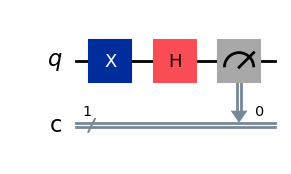

In [8]:
qc = QuantumCircuit(1, 1)

qc.x(0)
qc.h(0)

qc.measure(0, 0)

qc.draw('mpl')

In [9]:
sim_basic = BasicSimulator()
sim_aer   = AerSimulator()

In [10]:
counts_basic = sim_basic.run(qc, shots=100).result().get_counts()
counts_aer = sim_aer.run(qc, shots=100).result().get_counts()

print(counts_basic)
print(counts_aer)

{'1': 43, '0': 57}
{'0': 47, '1': 53}


In [11]:
sampler_aer = SamplerV2(mode=sim_aer)
simulation = sampler_aer.run([qc], shots=100)
results = simulation.result()
counts = results[0].data.c.get_counts()
counts

{'0': 49, '1': 51}

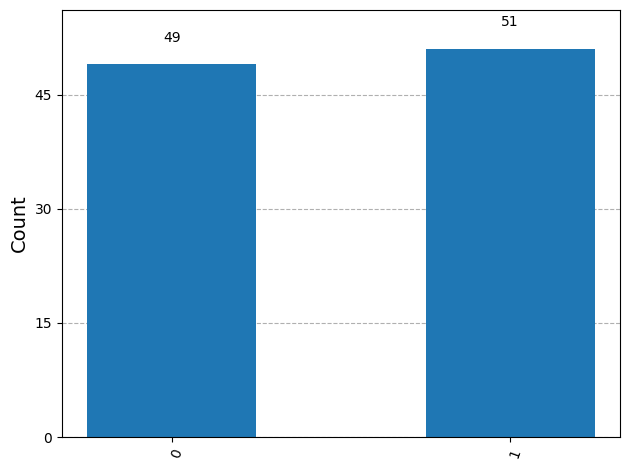

In [12]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)